In [1]:
def params(path,nam,directed):
    name = path+nam+".csv"
    stri = ["non-strict"]
    be = ["bet", "bet_exact"]
    if directed:
        name = name+"_directed_exp"
    else:
        name = name+"_undirected_exp"
    name = name + "_boost/"
    cost_type = [["shortest","passive"], ["shortest","active"]]
    app = [-1]
    return (name,be,stri,cost_type,app)

In [2]:
def info(name,nam):
    f = open(name+"info_-1.txt", "r")
    print(nam,end='')
    i = 0
    for x in f:
        x = x[:-1]
        res = x.split(" ")
        print(" & $"+str(res[-1])[:5]+"$",end="")
        i += 1
    print("\\\\")

In [3]:
def bet_statique(path):
    f = open(path+"staticBet.txt", "r")
    stat = []
    bet_stat = []
    i = 0
    for x in f:
        x = x[:-1]
        stat.append([float(x),i])
        bet_stat.append(float(x))
        i = i + 1
    return bet_stat

In [4]:
def charact(name):
#     print(name+"info_-1.txt")
    f = open(name+"info_-1.txt", "r")
#     print(name,end='')
    i = 0
    for x in f:
        x = x[:-1]
        res = x.split(" ")
        if i == 0:
            n = int(res[-1])
        if i == 1:
            T = int(res[-1])
        if i == 2:
            m = int(res[-1])
        i = i + 1
    return (n,T,m)

In [5]:
def res_dic(path, be,stri,cost_type,app,T):
    res = dict()
    res_bet = dict()
    res_sum_node = dict()
    res_sum_time = dict()

    for b in be:
        for st in stri:
            for co in cost_type:
                for ap in app:
                    #print(path+b+"_"+st+"_"+co[0]+"_"+co[1]+"_"+str(ap)+".txt")
                    f = open(path+b+"_"+st+"_"+co[0]+"_"+co[1]+"_"+str(ap)+".txt", "r")
                    if ap not in res:
                        res[ap] = dict()
                    if ap not in res_bet:
                        res_bet[ap] = dict()
                    if ap not in res_sum_node:
                        res_sum_node[ap] = dict()
                    if ap not in res_sum_time:
                        res_sum_time[ap] = dict()

                    if st not in res[ap]:
                        res[ap][st] = dict()
                    if st not in res_bet[ap]:
                        res_bet[ap][st] = dict()
                    if st not in res_sum_node[ap]:
                        res_sum_node[ap][st] = dict()
                    if st not in res_sum_time[ap]:
                        res_sum_time[ap][st] = dict()

                    if b not in res_bet[ap][st]:
                        res_bet[ap][st][b] = dict()
                    res_bet[ap][st][b][co[0]+"_"+co[1]] = []

                    if b not in res[ap][st]:
                        res[ap][st][b] = dict()

                    if b not in res_sum_node[ap][st]:
                        res_sum_node[ap][st][b] = dict()
                    if b not in res_sum_time[ap][st]:
                        res_sum_time[ap][st][b] = dict()

                    if co[1] not in res[ap][st][b]:
                        res[ap][st][b][co[1]] = dict()
                    if co[1] not in res_sum_node[ap][st][b]:
                        res_sum_node[ap][st][b][co[1]] = dict()
                    if co[1] not in res_sum_time[ap][st][b]:
                        res_sum_time[ap][st][b][co[1]] = dict()

                    res[ap][st][b][co[1]][co[0]] = []

                    res_sum_time[ap][st][b][co[1]][co[0]] = [0 for i in range(T)]
                    res_sum_node[ap][st][b][co[1]][co[0]] = [0 for i in range(n)]



                    i = 0
                    for x in f:
                        res_sum_node[ap][st][b][co[1]][co[0]][i//T] +=  float(x)
                        res_sum_time[ap][st][b][co[1]][co[0]][i%T] += float(x)
                        res[ap][st][b][co[1]][co[0]].append(float(x))
                        res_bet[ap][st][b][co[0]+"_"+co[1]].append(float(x))
                        i += 1
    return (res,res_bet,res_sum_node,res_sum_time)

In [6]:
import scipy.stats as stats
import matplotlib.pyplot as plt
def kendallrank(res_sum_node,bet_stat):
    tau1, p_value = stats.kendalltau(res_sum_node[-1]["non-strict"]["bet_exact"]["active"]["shortest"], res_sum_node[-1]["non-strict"]["bet_exact"]["passive"]["shortest"])
    tau2, p_value = stats.kendalltau(res_sum_node[-1]["non-strict"]["bet_exact"]["active"]["shortest"], bet_stat)
    tau3, p_value = stats.kendalltau(res_sum_node[-1]["non-strict"]["bet_exact"]["passive"]["shortest"], bet_stat)
    return [tau1, tau2, tau3]

In [35]:
path = "/home/mehdi/Nextcloud/experiments/betweenness_discrete/shortest/"
cor = []
names = [["primaryschool",False,"green"],["highschool_2012",False,"green"], ["highschool_2011",False,"orange"], ["hospital_ward",False,"blue"], ["workplace_2013",False,"blue"], ["ht09",False,"blue"]]
for nam,dire,col in names:
    path_add,be,stri,cost_type,app = params(path,nam,dire)
#     print(path_add)
    n, T, m = charact(path_add)
    res,res_bet,res_sum_node,res_sum_time = res_dic(path_add,be,stri,cost_type,app,T)
#     print(path_add)
    name_curve = nam
    bet_stat = bet_statique(path_add)
    l = kendallrank(res_sum_node,bet_stat)
    cor.append(l)

In [36]:
cor

[[0.8848461986900311, 0.8228455814272487, 0.8185247419498645],
 [0.8706313241045379, 0.7659693339127196, 0.8096716121422808],
 [0.9001904761904762, 0.8067301587301587, 0.8323809523809524],
 [0.8421621621621623, 0.7535135135135136, 0.788828828828829],
 [0.8709985666507405, 0.7711419015766842, 0.8150979455327281],
 [0.8675726927939318, 0.7765486725663716, 0.8091024020227559]]

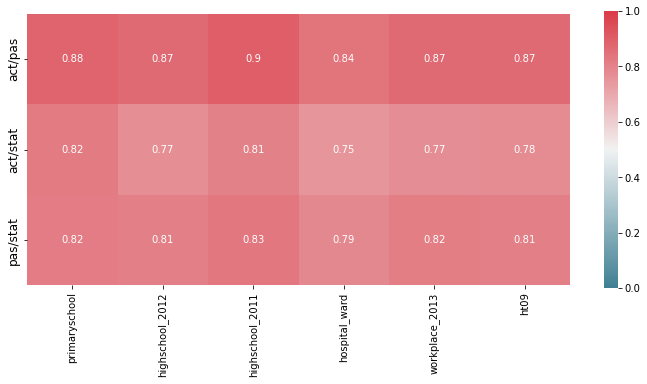

In [37]:
bet_comp = ["act/pas", "act/stat", "pas/stat"]
import numpy as np
import seaborn as sns
import pandas as pd
from pylab import savefig

cor_mat = np.matrix(cor)
transp = cor_mat.transpose()
#, 'row_names': bet_comp
# {} , orient='index' 'column_names': ['z1', 'z2','z3'],
# d = {[names[i][0],bet_comp[j]] : cor[i][j] for j in range(len(bet_comp))  for i in range(len(cor)) } 
df = pd.DataFrame.from_dict( data=transp)
df.index = bet_comp
df.columns = list(map(lambda x : x[0], names))
f, ax = plt.subplots(figsize=(10, 8))
# corr = df.corr()
svm = sns.heatmap(df,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=0, vmax=1.0,
    square=True, ax=ax, cbar_kws={"shrink": 0.5}, annot=transp)
figure = svm.get_figure()  
plt.xticks(fontsize=10) 
plt.yticks(fontsize=12) 

figure.savefig('heat_short_node.png', dpi=400,bbox_inches='tight')
figure.tight_layout()

In [10]:
time = []
for nam,dire,col in names:
    path_add,be,stri,cost_type,app = params(path,nam,dire)
#     print(path_add)
    n, T, m = charact(path_add)
    res,res_bet,res_sum_node,res_sum_time = res_dic(path_add,be,stri,cost_type,app,T)
#     print(path_add)
    l = [res_sum_time[-1]["non-strict"]["bet_exact"]["active"]["shortest"], res_sum_time[-1]["non-strict"]["bet_exact"]["passive"]["shortest"]]
    time.append(l)

/tmp/ipykernel_73383/3789465038.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


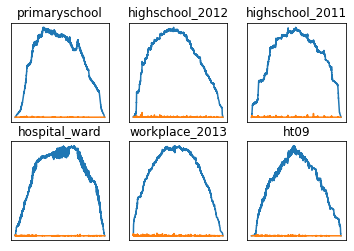

In [11]:
import numpy as np
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 3)
for i in range(len(names)):
    ti = time[i][0]
    ti2 = time[i][1]
    m = max(max(ti),max(ti2))
    s = list(map(lambda x : x/1, ti ))
    s2 = list(map(lambda x : x/1, ti2 ))

    t = [j for j in range(len(ti))]
    axs[i//3, i%3].plot(t, s)
    axs[i//3, i%3].plot(t, s2)
    axs[i//3, i%3].set(xlabel='', ylabel='',title=names[i][0])
    axs[i//3, i%3].set_xticks([])
    axs[i//3, i%3].set_yticks([])
# fig.delaxes(axs[1][2])
fig.savefig("short_time.png")
fig.show()


/tmp/ipykernel_73383/3277496867.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


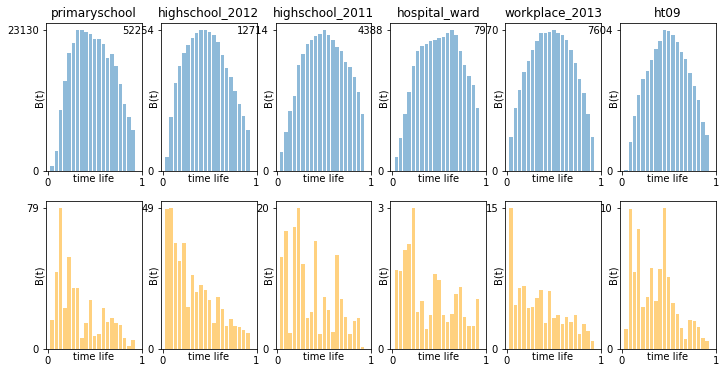

In [12]:
from matplotlib.pyplot import figure
import numpy as np
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 6)
for i in range(len(names)):
    ti = time[i][0]
    ti2 = time[i][1]
    s = list(map(lambda x : x/1, ti ))
    s2 = list(map(lambda x : x/1, ti2 ))
    t = [j for j in range(len(ti))]
    nb = 20
    ba_val = []
    su = sum(ti)
    su2 = sum(ti2)
    ba_val2 = []
    bins = np.arange(0, len(ti), len(ti)/(nb+1)) # fixed bin size
    for j in range(len(list(bins))-1):
        ba_val.append(sum(ti[int(bins[j]):int(bins[j+1])]))
        ba_val2.append(sum(ti2[int(bins[j]):int(bins[j+1])]))
    axs[0, i].bar([j for j in range(len(ba_val))],ba_val, alpha=0.5)
    axs[1, i].bar([j for j in range(len(ba_val))],ba_val2, alpha=0.5, color = "orange")
    
#     if i == 0:
    axs[0,i].set(xlabel='time life', ylabel='B(t)',title=names[i][0])
    axs[0,i].yaxis.set_label_coords(-0.02,0.5)
    axs[0,i].xaxis.set_label_coords(0.5,-0.02)
    axs[0,i].set_xticks([-1,nb+1], labels=[0,1])
    axs[0,i].set_yticks([0,max(ba_val)],labels=[0,int(max(ba_val)/100)])
    
    axs[1,i].set(xlabel='time life', ylabel='B(t)')
    axs[1,i].yaxis.set_label_coords(-0.02,0.5)
    axs[1,i].xaxis.set_label_coords(0.5,-0.02)
    axs[1,i].set_xticks([-1,nb+1], labels=[0,1])
    axs[1,i].set_yticks([0,max(ba_val2)],labels=[0,int(max(ba_val2)/100)])
    

# fig.tight_layout(pad = 1)
fig.set_size_inches(12, 6)
fig.savefig("short_time.png")
fig.show()


In [13]:
path = "/home/mehdi/Nextcloud/experiments/betweenness_discrete/shortest/"
cor = []
names = [["primaryschool",False,"green"],["highschool_2012",False,"green"], ["highschool_2011",False,"orange"], ["hospital_ward",False,"blue"], ["workplace_2013",False,"blue"], ["ht09",False,"blue"]]
print("dataset & nodes & events & edges & Buss & active & passive & static \\\\")

for nam,dire,col in names:
    path_add,be,stri,cost_type,app = params(path,nam,dire)
#     print(path_add)
    n, T, m = charact(path_add)
    info(path_add,nam)

dataset & nodes & events & edges & Buss & active & passive & static \\
primaryschool & $242$ & $3100$ & $12577$ & $402.8$ & $1332.$ & $3.008$\\
highschool_2012 & $180$ & $11273$ & $45047$ & $355.6$ & $292.8$ & $0.692$\\
highschool_2011 & $126$ & $5609$ & $28539$ & $96.74$ & $95.92$ & $0.282$\\
hospital_ward & $75$ & $9453$ & $32424$ & $70.17$ & $171.6$ & $0.162$\\
workplace_2013 & $92$ & $7104$ & $9827$ & $49.27$ & $16.21$ & $0.076$\\
ht09 & $113$ & $5246$ & $20818$ & $60.23$ & $61.55$ & $0.202$\\


In [30]:
import scipy.stats as stats
import matplotlib.pyplot as plt
def max_int(res_sum_node,bet_stat):
    r = zip(res_sum_node[-1]["non-strict"]["bet_exact"]["active"]["shortest"], [i for i in range(len(res_sum_node[-1]["non-strict"]["bet_exact"]["active"]["shortest"]))])
    r2 = zip(res_sum_node[-1]["non-strict"]["bet_exact"]["passive"]["shortest"], [i for i in range(len(res_sum_node[-1]["non-strict"]["bet_exact"]["passive"]["shortest"]))])
    r3 = zip(bet_stat, [i for i in range(len(bet_stat))])
    l = list(r)
    l2 = list(r2)
    l3 = list(r3)
    l.sort(reverse=True)
    l2.sort(reverse=True)
    l3.sort(reverse=True)
    nb = 20
    s = set(list(map(lambda x : x[1] ,l[:nb])))
    s2 = set(list(map(lambda x : x[1] ,l2[:nb])))
    s3 = set(list(map(lambda x : x[1] ,l3[:nb])))
    return [len(s.intersection(s2))/nb, len(s.intersection(s3))/nb, len(s2.intersection(s3))/nb]

In [31]:
path = "/home/mehdi/Nextcloud/experiments/betweenness_discrete/shortest/"
maxx = []
names = [["primaryschool",False,"green"],["highschool_2012",False,"green"], ["highschool_2011",False,"orange"], ["hospital_ward",False,"blue"], ["workplace_2013",False,"blue"], ["ht09",False,"blue"]]
for nam,dire,col in names:
    path_add,be,stri,cost_type,app = params(path,nam,dire)
#     print(path_add)
    n, T, m = charact(path_add)
    res,res_bet,res_sum_node,res_sum_time = res_dic(path_add,be,stri,cost_type,app,T)
#     print(path_add)
    name_curve = nam
    bet_stat = bet_statique(path_add)
    l = max_int(res_sum_node,bet_stat)
    maxx.append(l)

In [32]:
maxx

[[0.75, 0.8, 0.85],
 [0.75, 0.75, 0.8],
 [0.8, 0.75, 0.75],
 [0.85, 0.85, 0.9],
 [1.0, 0.85, 0.85],
 [0.85, 0.8, 0.8]]

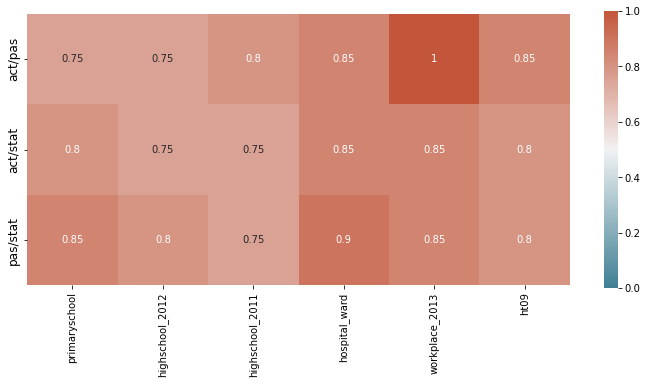

In [65]:
bet_comp = ["act/pas", "act/stat", "pas/stat"]
import numpy as np
import seaborn as sns
import pandas as pd
from pylab import savefig

maxx_mat = np.matrix(maxx)
transp = maxx_mat.transpose()

df = pd.DataFrame.from_dict( data=transp)
df.index = bet_comp
df.columns = list(map(lambda x : x[0], names))
f, ax = plt.subplots(figsize=(10, 8))
# corr = df.corr()
svm = sns.heatmap(df, cmap=sns.diverging_palette(220, 20, as_cmap=True),
    vmin=0, vmax=1.0,
    square=True, ax=ax, cbar_kws={"shrink": 0.5}, annot=transp)
figure = svm.get_figure()  
plt.xticks(fontsize=10) 
plt.yticks(fontsize=12) 

figure.savefig('heat_short_node_inter.png', dpi=400,bbox_inches='tight')
figure.tight_layout()